<a href="https://colab.research.google.com/github/xersuy/pandas_10min_study/blob/main/pandas_10min_class_16_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시계열 데이터 분석 Windows
**시계열 데이터(Time Series Data)분석을 위한 판다스 Expanding and Rolling**

https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.expanding.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html

In [42]:
import pandas as pd
import numpy as np
%matplotlib inline

In [43]:
s = pd.Series(np.random.randn(1000),
          index=pd.date_range('1/1/2015', periods=1000))
s

2015-01-01    0.662193
2015-01-02    0.345220
2015-01-03    0.299316
2015-01-04   -0.083122
2015-01-05   -0.771591
                ...   
2017-09-22   -1.175065
2017-09-23    1.390865
2017-09-24    0.113139
2017-09-25    0.505295
2017-09-26   -0.638768
Freq: D, Length: 1000, dtype: float64

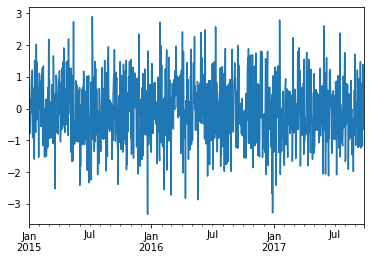

In [44]:
# plot은 이동평균
s.plot()

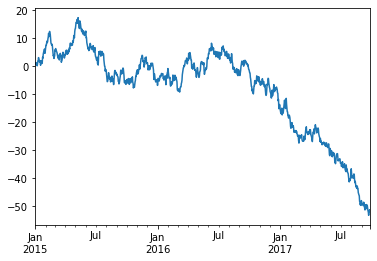

In [45]:
s = s.cumsum()
s.plot()

In [46]:
# window 30일 만큼 비어있음
r = s.rolling(window=30)
r.mean()

2015-01-01          NaN
2015-01-02          NaN
2015-01-03          NaN
2015-01-04          NaN
2015-01-05          NaN
                ...    
2017-09-22   -49.783169
2017-09-23   -49.980038
2017-09-24   -50.162635
2017-09-25   -50.262578
2017-09-26   -50.369454
Freq: D, Length: 1000, dtype: float64

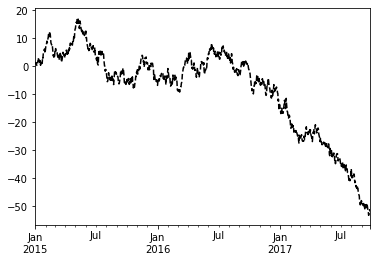

In [47]:
# 스타일만 바꿔줌
s.plot(style='k--')

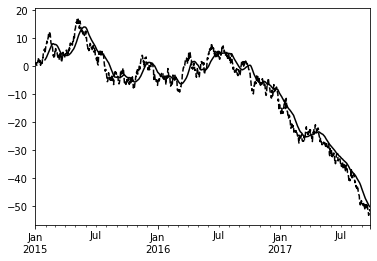

In [48]:
s.plot(style='k--')
r.mean().plot(style='k')

In [49]:
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=pd.date_range('1/1/2000', periods=1000),
                  columns=['A','B','C','D'])
df

,A,B,C,D
2000-01-01,-0.991036,1.051149,0.125407,-0.820685
2000-01-02,0.343348,0.673291,1.668476,-0.292065
2000-01-03,-0.218775,2.571439,-0.745378,0.733154
2000-01-04,-0.166746,-1.200249,0.922107,-0.469550
2000-01-05,0.219163,1.508280,-0.188413,0.272436
...,...,...,...,...
2002-09-22,1.270687,0.085590,1.001592,-1.261940
2002-09-23,0.619064,-1.219719,-1.210874,0.593566
2002-09-24,0.964713,-0.099343,1.048944,-0.086573
2002-09-25,-0.568807,-0.532997,0.037535,1.331828


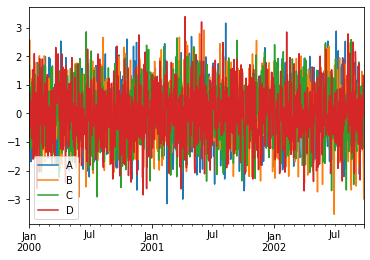

In [50]:

df.plot()

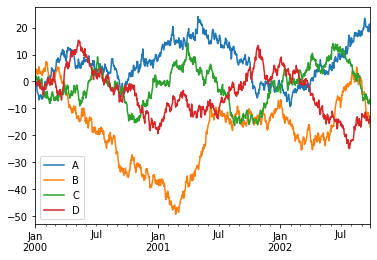

In [51]:
df = df.cumsum()
df.plot() 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f87eed33150>,
      dtype=object)

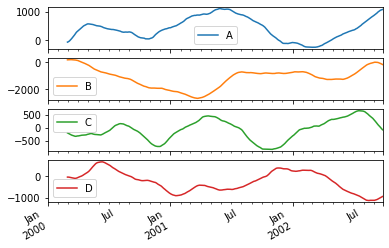

In [52]:
df.rolling(window=60).sum().plot(subplots=True)

In [53]:
# rolling
df.rolling(window=len(df), min_periods=1).mean()[:5]


,A,B,C,D
2000-01-01,-0.991036,1.051149,0.125407,-0.820685
2000-01-02,-0.819362,1.387795,0.959645,-0.966717
2000-01-03,-0.835062,2.357156,0.989265,-0.771010
2000-01-04,-0.884599,2.541775,1.234601,-0.790544
2000-01-05,-0.870488,2.954202,1.344120,-0.747777


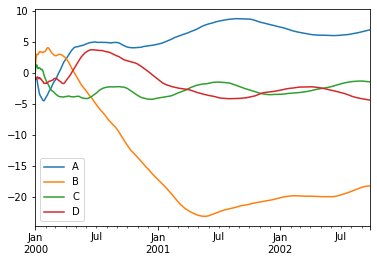

In [54]:
df.rolling(window=len(df), min_periods=1).mean().plot()

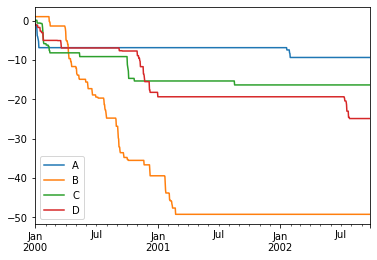

In [55]:
df.rolling(window=len(df), min_periods=1).min().plot()

In [56]:
df.expanding(min_periods=1).mean()

,A,B,C,D
2000-01-01,-0.991036,1.051149,0.125407,-0.820685
2000-01-02,-0.819362,1.387795,0.959645,-0.966717
2000-01-03,-0.835062,2.357156,0.989265,-0.771010
2000-01-04,-0.884599,2.541775,1.234601,-0.790544
2000-01-05,-0.870488,2.954202,1.344120,-0.747777
...,...,...,...,...
2002-09-22,6.923889,-18.183945,-1.384109,-4.313832
2002-09-23,6.937363,-18.179024,-1.391120,-4.324438
2002-09-24,6.951776,-18.174213,-1.397066,-4.335109
2002-09-25,6.965592,-18.169944,-1.402963,-4.344426


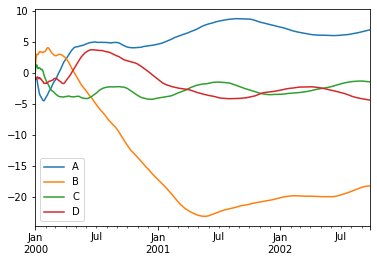

In [57]:
df.expanding(min_periods=1).mean().plot()

In [58]:
dfe = pd.DataFrame({'B': [0,1,2, np.nan, 4]})
dfe

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


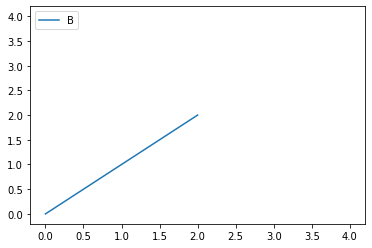

In [59]:
dfe.plot()

In [60]:
dfe.expanding(2).sum()

,B
0,NaN
1,1.0
2,3.0
3,3.0
4,7.0


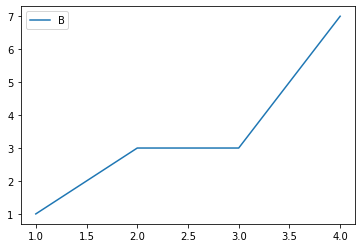

In [61]:
dfe.expanding(2).sum().plot()

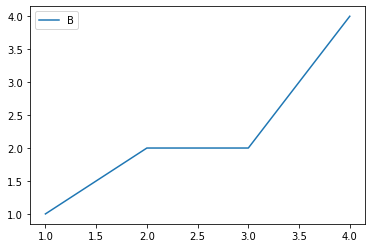

In [62]:
dfe.expanding(2).max().plot()

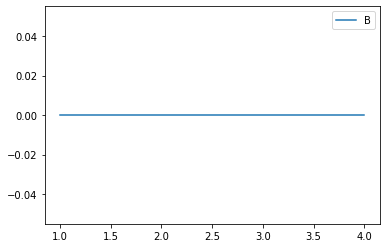

In [63]:
dfe.expanding(2).min().plot()

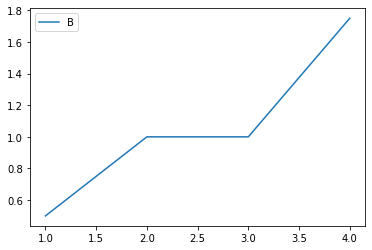

In [64]:
dfe.expanding(2).mean().plot()